In [2]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

saveFigs = False



In [22]:
from scipy.stats import binom, poisson, norm
pathFigures = '/home/thea/MesterTesen/WrittenWork/Figures/'

from SignalAttenuation import Attenuation, AnnualLayerThick



In [23]:
from GetCoreData_fct import GetCoreData

import sys 
import os
sys.path.append('../')
sys.path.append('../../')

from BackDiffuse_LT import BackDiffuse


from Interpolation_Class import Interpolation

from HL_AnalyticThea_class import HL_Thea
from DiffusionProfiles_calculations import DiffusionLength

from sigmaSolver import sigma_Solver

from transforms import transforms
from Decon import SpectralDecon



In [4]:
sites = ['SiteA','SiteB','SiteD','SiteE', 'SiteG']

In [5]:
depth_ECM_Laki_all = []; ECM_Laki_all = []
depth_ECM_Tamb_all = []; ECM_Tamb_all = []

dTamb_all = []
dLaki_all = []
lenTamb_all = []
lenLaki_all = []


for i in range(len(sites)):
    
    site = sites[i]
    N_InInt = 33

    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTamb_in = CoreSpecs['dTamb']
    dLaki_in = CoreSpecs['dLakiCor']

    DataAll = GetCoreData(site, 'Alphabet')

    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
    data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]

    depth = data_d18O['depth']; d18O = data_d18O['d18O']
    depth_LT = data_d18O_LT['depth']; d18O_LT = data_d18O_LT['d18O']

    depth_ECM = np.asarray(data_ECM['depth']); ECM = np.asarray(data_ECM['ECM'])
    depth_ECM_LT = np.asarray(data_ECM_LT['depth']); ECM_LT = np.asarray(data_ECM_LT['ECM'])

    
    lenTamb = (CoreSpecs['lenTamb'])/100
    lenLaki = (CoreSpecs['lenLakiCor'])/100

    startTamb = dTamb_in - lenTamb/2; endTamb = dTamb_in + lenTamb/2
    startLaki = dLaki_in - lenLaki/2; endLaki = dLaki_in + lenLaki/2



    depth_ECM_Laki = depth_ECM[(depth_ECM >= startLaki) & (depth_ECM <= endLaki)]
    ECM_Laki = ECM[(depth_ECM >= startLaki) & (depth_ECM <= endLaki)]

    depth_ECM_Tamb = depth_ECM[(depth_ECM >= startTamb) & (depth_ECM <= endTamb)]
    ECM_Tamb = ECM[(depth_ECM >= startTamb) & (depth_ECM <= endTamb)]
    
    
    dTamb_all.append(dTamb_in); dLaki_all.append(dLaki_in)
    lenTamb_all.append(lenTamb); lenLaki_all.append(lenLaki)
    
    depth_ECM_Laki_all.append(depth_ECM_Laki); ECM_Laki_all.append(ECM_Laki)
    depth_ECM_Tamb_all.append(depth_ECM_Tamb); ECM_Tamb_all.append(ECM_Tamb)
    

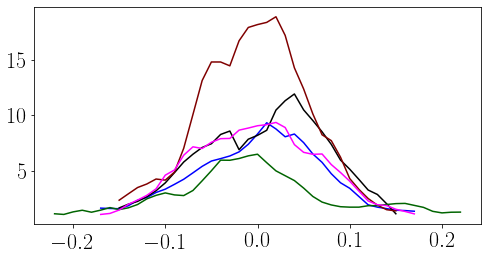

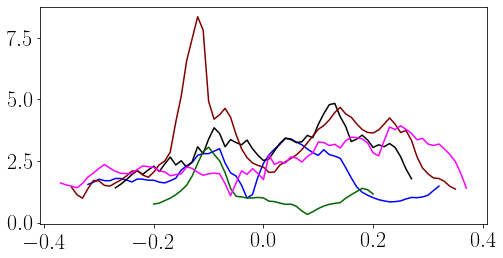

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
fig1, ax1 = plt.subplots(figsize=(8,4))

colors = ['b','k','maroon','darkgreen','magenta']
for i in range(len(sites)):
    offSetLaki = dLaki_all[i]#depth_ECM_Laki_all[i][0]
    offSetTamb = dTamb_all[i]#depth_ECM_Tamb_all[i][0]
    
    wTamb = lenTamb_all[i]/2
    wLaki = lenLaki_all[i]/2
    
    
    ax.plot(depth_ECM_Laki_all[i]-offSetLaki, ECM_Laki_all[i], c = colors[i])
#    ax.axvline(dLaki_all[i] - offSetLaki, lw=1, ls = '--', c = colors[i])
#    ax.axvline(dLaki_all[i] - offSetLaki - wLaki, lw=1, ls = '--', c = colors[i])
#    ax.axvline(dLaki_all[i] - offSetLaki + wLaki, lw=1, ls = '--', c = colors[i])
    
    
    ax1.plot(depth_ECM_Tamb_all[i]-offSetTamb, ECM_Tamb_all[i], c = colors[i])
#    ax1.axvline(dTamb_all[i] - offSetTamb, lw=1, ls = '--', c = colors[i])
#    ax1.axvline(dTamb_all[i] - offSetTamb - wTamb, lw=1, ls = '--', c = colors[i])
#    ax1.axvline(dTamb_all[i] - offSetTamb + wTamb, lw=1, ls = '--', c = colors[i])

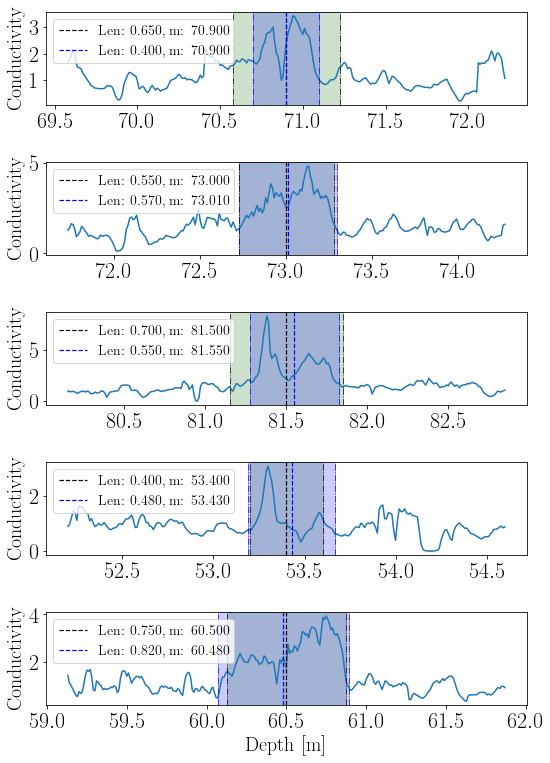

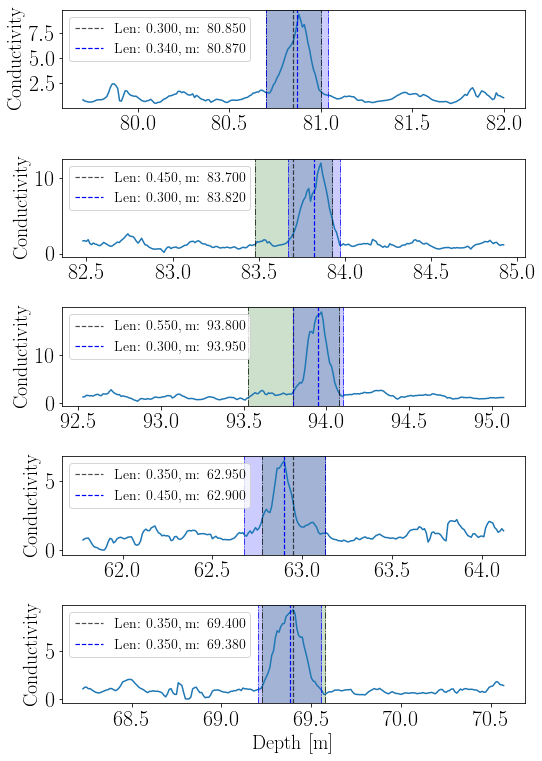

In [15]:
fig, ax = plt.subplots(len(sites),1,figsize=(8,11))#, sharex=True)
fig2, ax2 = plt.subplots(len(sites),1,figsize=(8,11))#, sharex=True)
#fig3, ax3 = plt.subplots(len(sites),1,figsize=(8,12), sharex=True)

for i in range(len(sites)):
    site = sites[i]
    N_InInt = 33

    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTamb_in = CoreSpecs['dTamb']
    dLaki_in = CoreSpecs['dLaki']
    dTamb_inCor = CoreSpecs['dTambCor']
    dLaki_inCor = CoreSpecs['dLakiCor']

    DataAll = GetCoreData(site, 'Alphabet')

    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
    data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]

    depth = data_d18O['depth']; d18O = data_d18O['d18O']
    depth_LT = data_d18O_LT['depth']; d18O_LT = data_d18O_LT['d18O']

    depth_ECM = np.asarray(data_ECM['depth']); ECM = np.asarray(data_ECM['ECM'])
    depth_ECM_LT = np.asarray(data_ECM_LT['depth']); ECM_LT = np.asarray(data_ECM_LT['ECM'])

    
    lenTamb = (CoreSpecs['lenTamb'])/100
    lenLaki = (CoreSpecs['lenLaki'])/100
    lenTambCor = (CoreSpecs['lenTambCor'])/100
    lenLakiCor = (CoreSpecs['lenLakiCor'])/100

    startTamb = dTamb_in - lenTamb/2; endTamb = dTamb_in + lenTamb/2
    startLaki = dLaki_in - lenLaki/2; endLaki = dLaki_in + lenLaki/2



    depth_ECM_Laki = depth_ECM[(depth_ECM >= startLaki) & (depth_ECM <= endLaki)]
    ECM_Laki = ECM[(depth_ECM >= startLaki) & (depth_ECM <= endLaki)]

    depth_ECM_Tamb = depth_ECM[(depth_ECM >= startTamb) & (depth_ECM <= endTamb)]
    ECM_Tamb = ECM[(depth_ECM >= startTamb) & (depth_ECM <= endTamb)]


    fitMin = 1
    fitMax = 1
    depth_ECM_Tamb_Fit = depth_ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endTamb+fitMax)]
    ECM_Tamb_Fit = ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endTamb+fitMax)]

    depth_ECM_Laki_Fit = depth_ECM[(depth_ECM >= startLaki-fitMin) & (depth_ECM <= endLaki+fitMax)]
    ECM_Laki_Fit = ECM[(depth_ECM >= startLaki-fitMin) & (depth_ECM <= endLaki+fitMax)]

    depth_ECM_LT_Fit = depth_ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endLaki+fitMax)]
    ECM_LT_Fit = ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endLaki+fitMax)]
    

    depth_Laki = depth[(depth >= startLaki) & (depth <= endLaki)]
    d18O_Laki = d18O[(depth >= startLaki) & (depth <= endLaki)]

    depth_Tamb = depth[(depth >= startTamb) & (depth <= endTamb)]
    d18O_Tamb = d18O[(depth >= startTamb) & (depth <= endTamb)]
    
    ax[i].plot(depth_ECM_Tamb_Fit, ECM_Tamb_Fit)
    ax[i].axvline(dTamb_in,c='k',ls='--',lw=1.2, label=f'Len: {lenTamb:.3f}, m: {dTamb_in:.3f}')
    ax[i].axvline(dTamb_in - lenTamb/2,c='k',ls='-.',lw=1, alpha=0.7)
    ax[i].axvline(dTamb_in + lenTamb/2,c='k',ls='-.',lw=1, alpha=0.7)
    ax[i].axvspan(dTamb_in - lenTamb/2, dTamb_in + lenTamb/2, alpha=0.2, color='darkgreen')
    
    ax[i].axvline(dTamb_inCor,c='b',ls='--',lw=1.2, label=f'Len: {lenTambCor:.3f}, m: {dTamb_inCor:.3f}')
    ax[i].axvline(dTamb_inCor - lenTambCor/2,c='b',ls='-.',lw=1, alpha=0.7)
    ax[i].axvline(dTamb_inCor + lenTambCor/2,c='b',ls='-.',lw=1, alpha=0.7)
    ax[i].axvspan(dTamb_inCor - lenTambCor/2, dTamb_inCor + lenTambCor/2, alpha=0.2, color='b')
    
    ax[i].legend(fontsize=14, loc='upper left')

    
    ax2[i].plot(depth_ECM_Laki_Fit, ECM_Laki_Fit)
    ax2[i].axvline(dLaki_in,c='k',ls='--',lw=1.2,alpha=0.7, label=f'Len: {lenLaki:.3f}, m: {dLaki_in:.3f}')
    ax2[i].axvline(dLaki_in - lenLaki/2,c='k',ls='-.',lw=1,alpha=0.7)
    ax2[i].axvline(dLaki_in + lenLaki/2,c='k',ls='-.',lw=1,alpha=0.7)
    ax2[i].axvspan(dLaki_in - lenLaki/2, dLaki_in + lenLaki/2, alpha=0.2, color='darkgreen')
    
    ax2[i].axvline(dLaki_inCor,c='b',ls='--',lw=1.2, label=f'Len: {lenLakiCor:.3f}, m: {dLaki_inCor:.3f}')
    ax2[i].axvline(dLaki_inCor - lenLakiCor/2,c='b',ls='-.',lw=1, alpha=0.7)
    ax2[i].axvline(dLaki_inCor + lenLakiCor/2,c='b',ls='-.',lw=1, alpha=0.7)
    ax2[i].axvspan(dLaki_inCor - lenLakiCor/2, dLaki_inCor + lenLakiCor/2, alpha=0.2, color='b')
    ax2[i].legend(fontsize=14, loc='upper left')
    ax2[i].set_ylabel('Conductivity', fontsize=20)
    ax[i].set_ylabel('Conductivity', fontsize=20)
ax[-1].set_xlabel('Depth [m]', fontsize=20)
ax2[-1].set_xlabel('Depth [m]', fontsize=20)

fig.tight_layout()
fig2.tight_layout()

In [17]:
pathFigures = '/home/thea/MesterTesen/WrittenWork/Figures/'
saveFigs=True
if saveFigs:
    fig.savefig(pathFigures+'TambDepth_corr.png', bbox_inches='tight')
    fig2.savefig(pathFigures+'LakiDepth_corr.png', bbox_inches='tight')

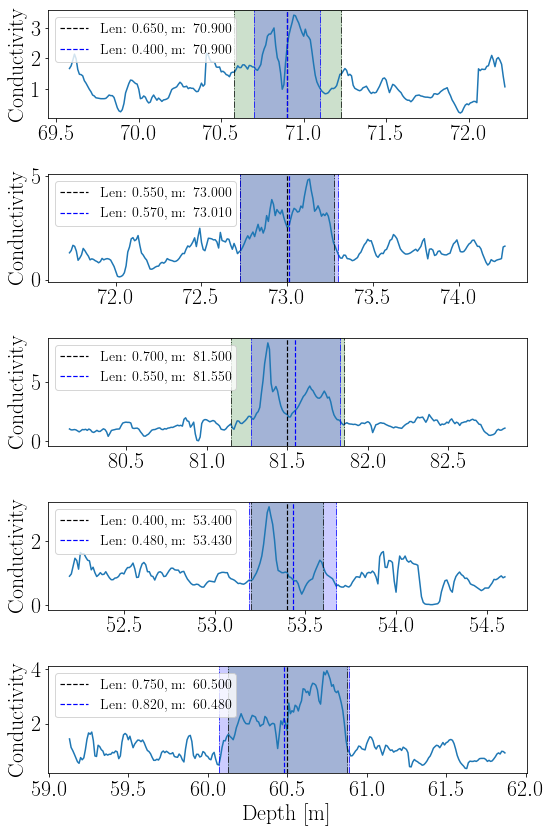

In [13]:
fig

In [18]:

def func_gaussian(x, N, mu, sigma, a):
    
    return N * norm.pdf(x, mu, sigma) + a

In [171]:
site = 'SiteA'
N_InInt = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb_in = CoreSpecs['dTambCor']
dLaki_in = CoreSpecs['dLakiCor']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth_ECM = np.asarray(data_ECM['depth']); ECM = np.asarray(data_ECM['ECM'])
depth_ECM_LT = np.asarray(data_ECM_LT['depth']); ECM_LT = np.asarray(data_ECM_LT['ECM'])

depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


lenTamb = (CoreSpecs['lenTamb'])/100
lenLaki = (CoreSpecs['lenLaki'])/100
lenTambCor = (CoreSpecs['lenTambCor'])/100
lenLakiCor = (CoreSpecs['lenLakiCor'])/100

startTamb = dTamb_in - lenTamb/2; endTamb = dTamb_in + lenTamb/2
startLaki = dLaki_in - lenLaki/2; endLaki = dLaki_in + lenLaki/2


depth_ECM_Laki = depth_ECM[(depth_ECM >= startLaki) & (depth_ECM <= endLaki)]
ECM_Laki = ECM[(depth_ECM >= startLaki) & (depth_ECM <= endLaki)]

depth_ECM_Tamb = depth_ECM[(depth_ECM >= startTamb) & (depth_ECM <= endTamb)]
ECM_Tamb = ECM[(depth_ECM >= startTamb) & (depth_ECM <= endTamb)]


fitMin = 0.2
fitMax = 0.2
depth_ECM_Tamb_Fit = depth_ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endTamb+fitMax)]
ECM_Tamb_Fit = ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endTamb+fitMax)]

depth_ECM_Laki_Fit = depth_ECM[(depth_ECM >= startLaki-fitMin) & (depth_ECM <= endLaki+fitMax)]
ECM_Laki_Fit = ECM[(depth_ECM >= startLaki-fitMin) & (depth_ECM <= endLaki+fitMax)]

depth_ECM_LT_Fit = depth_ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endLaki+fitMax)]
ECM_LT_Fit = ECM[(depth_ECM >= startTamb-fitMin) & (depth_ECM <= endLaki+fitMax)]


In [172]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

diffLens, dTambs0, dLakis0 = np.array(pd.read_csv(pathResults + site+'diffLens_GaussDistwDepths.csv', ' ', header=None))
dTambs = dTambs0
dLakis = dLakis0

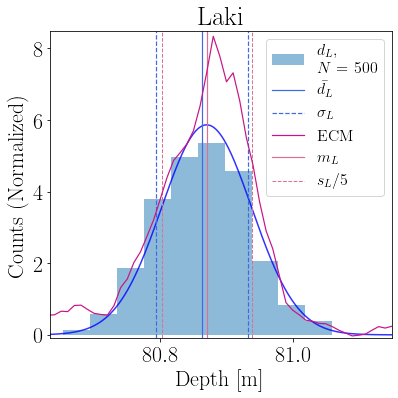

In [181]:

mu1 = dTamb_in
mu2 = dLaki_in

sig1 = CoreSpecs['lenTambCor']/400
sig2 = CoreSpecs['lenLakiCor']/500

xs1 = np.linspace(min(dTambs)-0.1, max(dTambs)+0.1, 1000)
xs2 = np.linspace(min(dLakis)-0.1, max(dLakis)+0.1, 1000)
gauss1 = func_gaussian(xs1, 1, mu1, sig1, 0)
gauss2 = func_gaussian(xs2, 1, mu2, sig2, 0)



fig, ax = plt.subplots(figsize=(6,6))

ax.hist(dLakis, alpha=0.5, bins=10, label='$d_{L}$, \n$N$ = '+f'{len(dTambs)}', density=True)
ax.plot(xs2, gauss2, alpha=0.8, c='b')
ax.axvline(np.mean(dLakis), c='royalblue', lw=1.2,ls='-', label=r'$\bar{d_L}$')
ax.axvline(np.mean(dLakis) - np.std(dLakis), c='royalblue', lw=1.2,ls='--', label=r'$\sigma_L$')
ax.axvline(np.mean(dLakis) + np.std(dLakis), c='royalblue', lw=1.2,ls='--')

ax.axvline(dLaki_in, c='palevioletred', lw=1.2,ls='-', label='$m_L$')
ax.axvline(mu2 - sig2, c='palevioletred', lw=1,ls='--', label='$s_L/5$')
ax.axvline(mu2+sig2, c='palevioletred', lw=1,ls='--')

#ax.axvline(startLaki, c='palevioletred', lw=1,ls='--', label='$s_L$')
#ax.axvline(endLaki, c='palevioletred', lw=1,ls='--')
ax.plot(depth_ECM_Laki_Fit, ECM_Laki_Fit-1,lw=1.2, c='mediumvioletred', label='ECM')

handles, labels = ax.get_legend_handles_labels()
order = [5,0,1,4,2,3]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=16, loc='upper right')
ax.set(title='Laki', ylabel='Counts (Normalized)', xlabel = 'Depth [m]',xlim=(min(xs2)+0.08,max(xs2)-0.01), ylim=(-0.1,8.5))
fig.tight_layout()

if saveFigs:
    fig.savefig(pathFigures+site+'LakiDepth_Gauss.png', bbox_inches='tight')


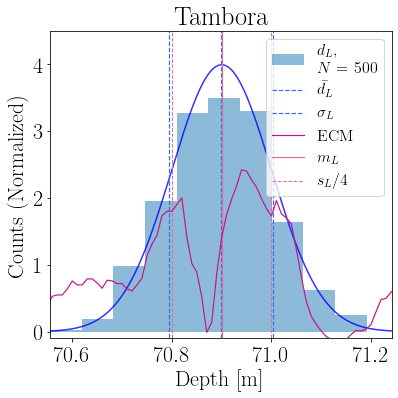

In [178]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(dTambs, alpha=0.5, bins=10, label='$d_{L}$, \n$N$ = '+f'{len(dTambs)}', density=True)
ax.plot(xs1, gauss1, alpha=0.8, c='b')
ax.axvline(np.mean(dTambs), c='royalblue', lw=1.2,ls='--', label=r'$\bar{d_L}$')

ax.axvline(np.mean(dTambs) - np.std(dTambs), c='royalblue', lw=1.2,ls='--', label=r'$\sigma_L$')
ax.axvline(np.mean(dTambs) + np.std(dTambs), c='royalblue', lw=1.2,ls='--')

ax.axvline(dTamb_in, c='palevioletred', lw=1.2,ls='-', label='$m_L$')
ax.axvline(mu1 - sig1, c='palevioletred', lw=1,ls='--', label='$s_L/4$')
ax.axvline(mu1+sig1, c='palevioletred', lw=1,ls='--')

ax.plot(depth_ECM_Tamb_Fit, ECM_Tamb_Fit-1,lw=1.2, c='mediumvioletred', label='ECM')

handles, labels = ax.get_legend_handles_labels()
order = [5,0,1,4,2,3]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=16, loc='upper right')
ax.set(title='Tambora', ylabel='Counts (Normalized)', xlabel = 'Depth [m]',xlim=(min(xs1)+0.1,max(xs1)-0.05), ylim=(-0.1,4.5))
fig.tight_layout()

if saveFigs:
    fig.savefig(pathFigures+site+'TambDepth_Gauss.png', bbox_inches='tight')
